# Problem Set 3: Reinforcement Learning and Constraint Satisfaction

## Q1 Reinforcement Learning [Total: 40 points]

### Q1a. [15 points] *Written RL problem*

For a simple cliff-walker Q-value problem, compute the Q-values at each state. The goal is the cell marked in green (with a reward of 0), and stepping on the red cells results in immediate failure with reward -100. All other states get a reward of -1.

The Q-value equation is given by:
$$Q(s,a) = r + \gamma\max_a’ Q(s’,a’)$$

Assume a discount factor of 1.0 (i.e. $\gamma = 1$).
As an example, Q-values for one cell have been computed for you.

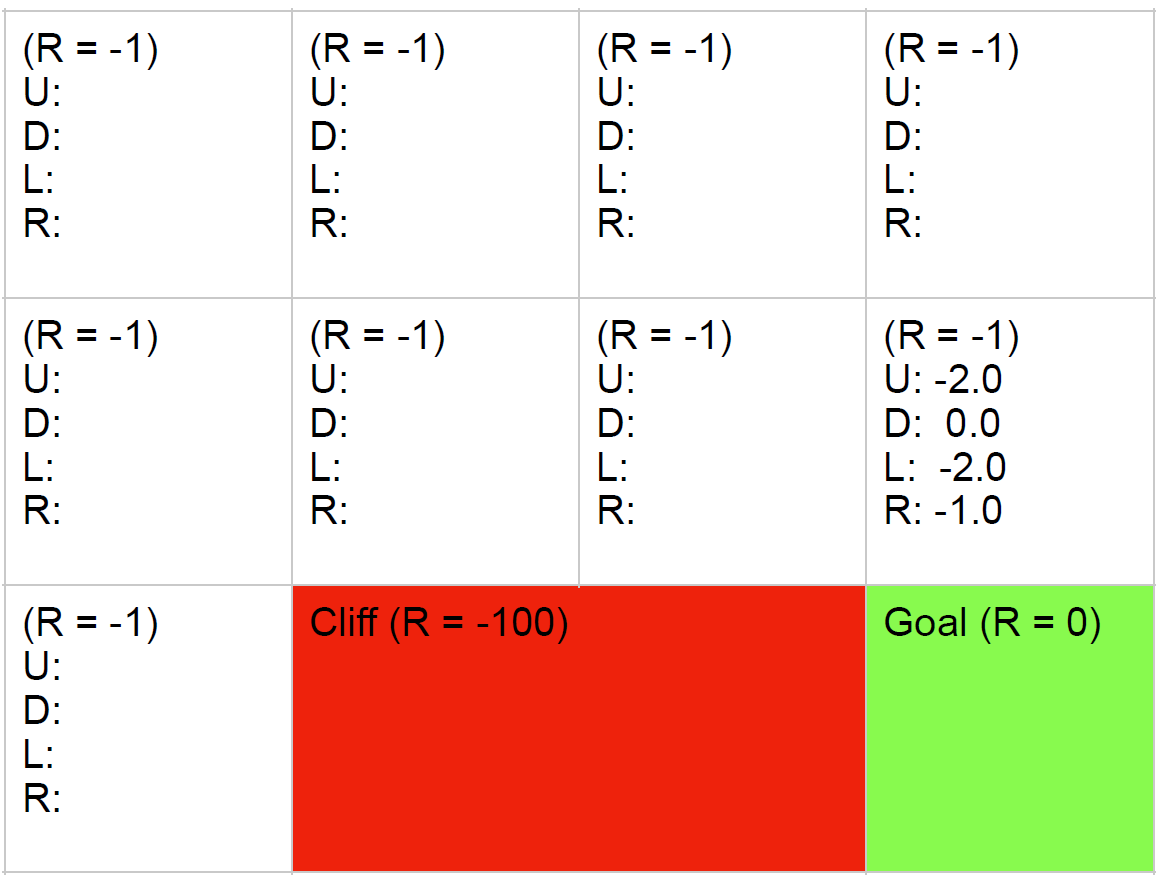

### Q1b. [25 points] *Coding RL problem*

Let's start by reading about the [Cliff Walking Problem](https://medium.com/@lgvaz/understanding-q-learning-the-cliff-walking-problem-80198921abbc)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from CliffWalker import GridWorld

We create a $4 \times 12$ grid, similar to the written problem in 1a. above on which you will implement a Q-learning algorithm.

None
(12, -1, False)
(0, -1, False)
None
(1, -1, False)
(2, -1, False)
(14, -1, False)
(15, -1, False)
(16, -1, False)
(28, -1, False)
None
(41, -100, True)
(42, -100, True)
(42, -100, True)


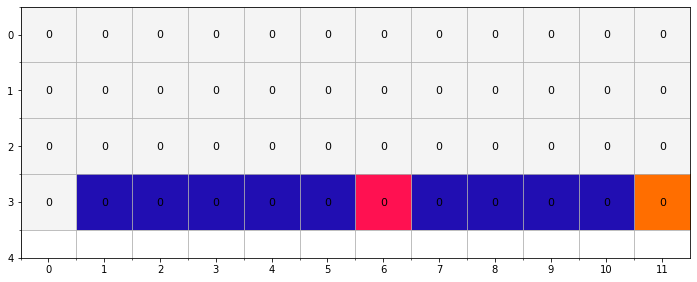

(29, -1, False)


In [4]:
env = GridWorld()

# The number of states in simply the number of "squares" in our grid world, in this case 4 * 12
num_states = 4 * 12
# We have 4 possible actions, up, down, right and left
num_actions = 4

a = []

env.reset()
#print(a.append(env.reset()))
print(a.append(env.step(0)))
print(env.step(0))
print(env.step(0))
print(a.append(env.step(2)))
print(env.step(0))
print(env.step(2))
print(env.step(1))
print(env.step(2))
print(env.step(2))
print(env.step(1))
print(a.append(env.step(2)))
print(env.step(1))
print(env.step(2))
print(env.step(-1))
env.render()

print(max(a))

# STEPS / ACTION
# 0 = up
# 1 = down
# 2 = right
# 3 = left

## Tasks

We ask you to implement two functions:
- an $\epsilon$-greedy action picker
- a basic Q-learning algorithm

$\epsilon$-greedy choices make the greedy choice most of the time but choose a random action $\epsilon$ fraction of the time. For example, for $\epsilon = 0.1$, if a random number is $\leq 0.1$, then a random action is taken.

In [5]:
def egreedy_policy(q_values, state, epsilon=0.1):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        return np.argmax(q_values[state])

# def egreedy_policy(q_values, state, epsilon=0.1):
#     ''' 
#     Choose an action based on a epsilon greedy policy.    
#     A random action is selected with epsilon probability, else select the best action.    
#     '''
#     action = 0
#     n = np.random.random() 
#     if n < epsilon:
#         action = np.random.choice(4)
#     else:
#         steps = [[0, 0, False]] * 4
#         current_state, reward, done = state.step(-1)
#         future_state = current_state
#         best_action = -1
#         for a in range(4):
#             next_state, reward, done = state.step(a)
#             steps[i] = [next_state, reward, done]
#         for b in range(len(steps)):
#             if steps[b][2] != True:
#                 if steps[b][0] > future_state:
#                     future_state = steps[b][0]
#                     best_action = steps[b][1]
#         action = best_action
#     return action
    
# print(str(np.random.choice(4)))

# b = [[0, 0, 0, 0]] * 4
# print(b)

Now, you can implement a basic Q-learning algorithm. For your reference, use the following:

![Q-learning](./Q-learning_Alg.png)

We provide a skeleton code, leaving the Q-value update for you to implement. 

**Note**: learning rate $\alpha$, exploration rate $\epsilon$, and discount factor $\gamma$ are provided as inputs to the function

In [6]:
def q_learning(env, num_episodes=200, render=True, epsilon=0.1,
               learning_rate=0.5, gamma=0.9):    
    q_values = np.zeros((num_states, num_actions))
    ep_rewards = []
    
    for _ in range(num_episodes):
        state = env.reset()    
        done = False
        reward_sum = 0

        while not done:            
            # Choose action        
            action = egreedy_policy(q_values, state, epsilon)
            # Do the action
            next_state, reward, done = env.step(action)
            reward_sum += reward
            
#             print("before:\n")
#             print(q_values)
            
            # Update Q-values    
            # === STUDENT CODE GOES HERE ===
            td_target = reward + gamma * np.max(q_values[next_state])
            td_error = td_target - q_values[state][action]
            q_values[state][action] += learning_rate * td_error
            # ==============================
            
#             print("after:\n")
#             print(q_values)
            # Update state
            state = next_state
            
        ep_rewards.append(reward_sum)
    
    return ep_rewards, q_values

# print(42//12)
# print(42%12)

Now, let's the run Q-learning

Mean Reward: -45.6385


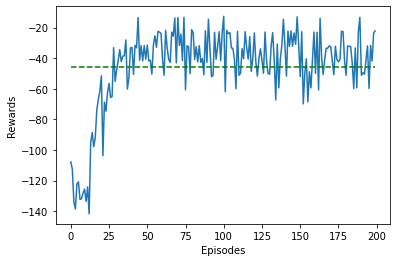

In [7]:
q_learning_rewards, q_values = q_learning(env, gamma=0.9, learning_rate=1, render=False)

q_learning_rewards, _ = zip(*[q_learning(env, render=False, epsilon=0.1, learning_rate=1) for _ in range(10)])
avg_rewards = np.mean(q_learning_rewards, axis=0)
mean_reward = [np.mean(avg_rewards)] * len(avg_rewards)

fig, ax = plt.subplots()
ax.set_xlabel('Episodes')
ax.set_ylabel('Rewards')
ax.plot(avg_rewards)
ax.plot(mean_reward, 'g--')

print('Mean Reward: {}'.format(mean_reward[0]))

### Visualization

Finally, let's look at the policy learned

In [8]:
def play(q_values):
    env = GridWorld()
    state = env.reset()
    done = False

    while not done:    
        # Select action
        action = egreedy_policy(q_values, state, 0.0)
        # Do the action
        next_state, reward, done = env.step(action)  

        # Update state and action        
        state = next_state  
        
        env.render(q_values=q_values, action=action, colorize_q=True)

In [9]:
%matplotlib
play(q_values)

Using matplotlib backend: MacOSX


## Q2 Constraint Satisfaction [Total: 10 points] 

### *Written CS problem*

Suppose we want to schedule some final exams for CS courses with the following course numbers: 1007, 3137, 3157, 3203, 3261, 4115, 4118, 4156

Suppose also that there are no students in common taking the following pairs of courses:

1007‐3137

1007‐3157, 3137‐3157

1007‐3203

1007‐3261, 3137‐3261, 3203‐3261

1007‐4115, 3137‐4115, 3203‐4115, 3261‐4115

1007‐4118, 3137‐4118

1007‐4156, 3137‐4156, 3157‐4156


How many exam slots are necessary to schedule exams?